# Behavior Benchmark Tutorial

Every behavioral benchmark has two key components:
1. Behavioral Data (that is stored in a `BehaviorAssembly` object)
2. Metric - which defines how we want to compare the model measurements against the experimental data.


The data has two key components:
1. StimulusSet (subclass of pandas) - basically a master sheet which references which stimulus to present and where to find it.
2. DataAssembly (subclass of xarray) - the experimental data. (.nc file NETCDF)
These are packaged into a `BehaviorAssembly object`.

The StimulusSet has two key components:
1. CSV - metadata
2. Zipped folder containing the stimulus data.

## Data Requirements

In [1]:
import brainscore_vision
import pandas as pd
from PIL import Image
import xarray as xr

/opt/anaconda3/envs/vision-UROP/lib/python3.11/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


### Load the data

The `load_dataset` function will load the StimulusSet and DataAssembly to your `.brainio` folder.

In [2]:
# Here the data identifier can be used to easily load the data.
behavior_data = brainscore_vision.load_dataset("Rajalingham2018.public")
behavior_data

brainscore-storage/brainio-brainscore/assy_dicarlo_Rajalingham2018_public.nc: 100%|██████████| 253M/253M [00:12<00:00, 20.7MB/s] 
brainscore-storage/brainio-brainscore/stimulus_objectome_public.csv: 100%|██████████| 270k/270k [00:00<00:00, 965kB/s]
brainscore-storage/brainio-brainscore/stimulus_objectome_public.zip: 100%|██████████| 79.6M/79.6M [00:04<00:00, 17.1MB/s]


<xarray.BehavioralAssembly 'dicarlo.Rajalingham2018.public' (
                                                             presentation: 585511)>
dask.array<open_dataset-16f37bc1c7f58e08afdcb5e36315e5d2dicarlo.Rajalingham2018.public, shape=(585511,), dtype=object, chunksize=(585511,), chunktype=numpy.ndarray>
Coordinates:
  * presentation      (presentation) MultiIndex
  - sample_obj        (presentation) object 'MB28699' ... 'MB28699'
  - dist_obj          (presentation) object 'dromedary' ... 'dromedary'
  - choice            (presentation) object 'MB28699' ... 'MB28699'
  - image_id          (presentation) object 'acaf817c42d2a46130e6ee67dad1b7d0...
  - WorkerID          (presentation) object 'AIW6ALUI8LBXV' ... 'A2OF0GTKWKM2T5'
  - AssignmentID      (presentation) object '2W9GYQ4J3NABXRMPS3FY2IT39ZKCPJ' ...
  - truth             (presentation) object 'MB28699' ... 'MB28699'
  - stimulus_id       (presentation) object 'acaf817c42d2a46130e6ee67dad1b7d0...
  - image_label       (presentation) object 'MB28699' ... 'MB28699'
  - filename          (presentation) object 'acaf817c42d2a46130e6ee67dad1b7d0...
  - id                (presentation) int64 134848 135080 ... 134784 133660
  - image_sample_obj  (presentation) object 'MB28699' ... 'MB28699'
Attributes:
    stimulus_set_identifier:  objectome.public
    stimulus_set:                               image_label                  ...
    identifier:               dicarlo.Rajalingham2018.public

<img src="./assets/rajalingham2018_brainio.png" width="750">

We can navigate to the folder to see the data or we can just reference the `behavior_data` object.

In this dataset, the data is stored in a behaviorAssembly.

This BehaviorAssembly is made up a DataAssembly and a StimulusSet. The DatAssembly is stored within the `data` dimension, and the StimulusSet is stored in the `attrs` dictionary. The StimulusSet is a subclass of pandas and is essentially a 2D dataframe, and the DataAssembly is a subclass of xarray.

Within the `data` dimension, we have 4292 presentations, which refers to the presentation of a stimulus to a subject. Te values in this case then correspond to the responses of subjects to the stimuli.


In [3]:
print(f"The type of the StimulusSet is {type(behavior_data.attrs['stimulus_set'])}")
print(f"The type of the DataAssembly is {type(behavior_data)}")

The type of the StimulusSet is <class 'brainio.stimuli.StimulusSet'>
The type of the DataAssembly is <class 'brainio.assemblies.BehavioralAssembly'>


### StimulusSet

#### We can access to the StimulusSet data from the csv file stored in the `.brainio` folder.

In [5]:
sample_csv = pd.read_csv('/Users/kartik/.brainio/stimulus_objectome_public/stimulus_objectome_public.csv')
sample_csv.head(10)


,image_label,image_id,filename,id,image_sample_obj
0,flarenut_spanner,0020cef91bd626e9fbbabd853494ee444e5c9ecb,0020cef91bd626e9fbbabd853494ee444e5c9ecb.png,133477,flarenut_spanner
1,dromedary,00a313fc5929bb79e49ead5de202a317eeafe659,00a313fc5929bb79e49ead5de202a317eeafe659.png,133478,dromedary
2,MB29874,00c6269c951f5ce5bf0a77c45c5e6fb3d2ec694e,00c6269c951f5ce5bf0a77c45c5e6fb3d2ec694e.png,133479,MB29874
3,MB29874,00e9fb160a10345d5a27850c946195724583514b,00e9fb160a10345d5a27850c946195724583514b.png,133480,MB29874
4,interior_details_130_2,0119aa4a7957d1db7f4e6803f00d3868eb8e028b,0119aa4a7957d1db7f4e6803f00d3868eb8e028b.png,133481,interior_details_130_2
5,zebra,0142a13bb38b90f6d4209470969b65d25908b12e,0142a13bb38b90f6d4209470969b65d25908b12e.png,133482,zebra
6,dromedary,015c5f3daa102400ffbd38b5e801d631146baff7,015c5f3daa102400ffbd38b5e801d631146baff7.png,133483,dromedary
7,lo_poly_animal_ELE_AS1,015dd19f8f1c1f10009b8ae2c4ab30e39055ac77,015dd19f8f1c1f10009b8ae2c4ab30e39055ac77.png,133484,lo_poly_animal_ELE_AS1
8,calc01,01a2f827c6d057f0821e1670a7f84efa36832733,01a2f827c6d057f0821e1670a7f84efa36832733.png,133485,calc01
9,antique_furniture_item_18,01a34e9d8aa8ae7ea73d54175aba0e936b14b89d,01a34e9d8aa8ae7ea73d54175aba0e936b14b89d.png,133486,antique_furniture_item_18


In [6]:
print(f"The size of the StimulusSet CSV is {sample_csv.shape}")

The size of the StimulusSet CSV is (2160, 5)


#### We can also access the StimulusSet directly from the `behavior_data` object.

In [7]:
# behavior_data.stimulus_set[:10] also achieves the same result
behavior_data.attrs['stimulus_set'][:30]

,image_label,image_id,filename,id,image_sample_obj,stimulus_id
0,flarenut_spanner,0020cef91bd626e9fbbabd853494ee444e5c9ecb,0020cef91bd626e9fbbabd853494ee444e5c9ecb.png,133477,flarenut_spanner,0020cef91bd626e9fbbabd853494ee444e5c9ecb
1,dromedary,00a313fc5929bb79e49ead5de202a317eeafe659,00a313fc5929bb79e49ead5de202a317eeafe659.png,133478,dromedary,00a313fc5929bb79e49ead5de202a317eeafe659
2,MB29874,00c6269c951f5ce5bf0a77c45c5e6fb3d2ec694e,00c6269c951f5ce5bf0a77c45c5e6fb3d2ec694e.png,133479,MB29874,00c6269c951f5ce5bf0a77c45c5e6fb3d2ec694e
3,MB29874,00e9fb160a10345d5a27850c946195724583514b,00e9fb160a10345d5a27850c946195724583514b.png,133480,MB29874,00e9fb160a10345d5a27850c946195724583514b
4,interior_details_130_2,0119aa4a7957d1db7f4e6803f00d3868eb8e028b,0119aa4a7957d1db7f4e6803f00d3868eb8e028b.png,133481,interior_details_130_2,0119aa4a7957d1db7f4e6803f00d3868eb8e028b
5,zebra,0142a13bb38b90f6d4209470969b65d25908b12e,0142a13bb38b90f6d4209470969b65d25908b12e.png,133482,zebra,0142a13bb38b90f6d4209470969b65d25908b12e
6,dromedary,015c5f3daa102400ffbd38b5e801d631146baff7,015c5f3daa102400ffbd38b5e801d631146baff7.png,133483,dromedary,015c5f3daa102400ffbd38b5e801d631146baff7
7,lo_poly_animal_ELE_AS1,015dd19f8f1c1f10009b8ae2c4ab30e39055ac77,015dd19f8f1c1f10009b8ae2c4ab30e39055ac77.png,133484,lo_poly_animal_ELE_AS1,015dd19f8f1c1f10009b8ae2c4ab30e39055ac77
8,calc01,01a2f827c6d057f0821e1670a7f84efa36832733,01a2f827c6d057f0821e1670a7f84efa36832733.png,133485,calc01,01a2f827c6d057f0821e1670a7f84efa36832733
9,antique_furniture_item_18,01a34e9d8aa8ae7ea73d54175aba0e936b14b89d,01a34e9d8aa8ae7ea73d54175aba0e936b14b89d.png,133486,antique_furniture_item_18,01a34e9d8aa8ae7ea73d54175aba0e936b14b89d


In [8]:
print(f"The type of the StimulusSet is {type(behavior_data.attrs['stimulus_set'])}")

The type of the StimulusSet is <class 'brainio.stimuli.StimulusSet'>


### StimulusSet Data
#### We can also access the stimulus data using information directly from the `behavior_data` object.

More information: [`get_stimulus()`](https://github.com/brain-score/brainio/blob/acff11f170c4486704af68bb893a887b6cbd3f9d/brainio/stimuli.py#L18)

This is a function that will retrieve the local path to the stimulus data.

The stimulus_id is 0020cef91bd626e9fbbabd853494ee444e5c9ecb
The path to the stimulus is /Users/kartik/.brainio/stimulus_objectome_public/0020cef91bd626e9fbbabd853494ee444e5c9ecb.png


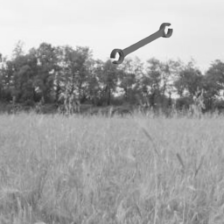

In [15]:
# We want to display the stimulus for the stimulus_id below
stimulus_id = behavior_data.attrs['stimulus_set']["stimulus_id"][0]
print(f"The stimulus_id is {stimulus_id}")
stimulus_path = behavior_data.attrs['stimulus_set'].get_stimulus(stimulus_id)
print(f"The path to the stimulus is {stimulus_path}")
Image.open(stimulus_path)

### DataAssembly

#### You can access the DataAssembly from the `.brainio` folder by treating it as a standard NetCDF file.

In [16]:
# The DataAssembly is a subclass of xarray, saved as a NetCDF file.
dataAssembly = xr.open_dataset('/Users/kartik/.brainio/assy_dicarlo_Rajalingham2018_public/assy_dicarlo_Rajalingham2018_public.nc')
dataAssembly

<xarray.Dataset>
Dimensions:                         (presentation: 585511)
Coordinates:
    sample_obj                      (presentation) object ...
    dist_obj                        (presentation) object ...
    choice                          (presentation) object ...
    image_id                        (presentation) object ...
    WorkerID                        (presentation) object ...
    AssignmentID                    (presentation) object ...
    truth                           (presentation) object ...
Dimensions without coordinates: presentation
Data variables:
    dicarlo.Rajalingham2018.public  (presentation) object ...

#### The preferred way is to interact directly with the `behavior_data` object via the coordinates.

`behavior_data[{coordinate_name}]`

In [17]:
behavior_data['stimulus_id'].values


array(['acaf817c42d2a46130e6ee67dad1b7d01f5276ab',
       'c6136cce2b429dad2a0d524051a3b34188bf4b85',
       '8f7c403960a68cc3435e9c3585ed713c57a3ed4f', ...,
       'de25946d4c591027fa292995ba98984a89d88329',
       'a62a9e13f983decf3085de471f3a53b068a3c496',
       '1eecb9c3fe08c876f5941c91784a14e42e8ca45c'], dtype=object)

In [20]:
print(f"The number of unique stimuli: {len(set(behavior_data['stimulus_id'].values))}")
print(f"The number of unique subjects: {len(set(behavior_data['WorkerID'].values))}")
print(f"The number of observations: {len(behavior_data)}")

The number of unique stimuli: 2160
The number of unique subjects: 1391
The number of observations: 585511


In [21]:
type(behavior_data.coords)

xarray.core.coordinates.DataArrayCoordinates

In [30]:
df = behavior_data.to_dataframe()
df

,,,,,,,,,,,,dicarlo.Rajalingham2018.public
sample_obj,dist_obj,choice,image_id,WorkerID,AssignmentID,truth,stimulus_id,image_label,filename,id,image_sample_obj,
MB28699,dromedary,MB28699,acaf817c42d2a46130e6ee67dad1b7d01f5276ab,AIW6ALUI8LBXV,2W9GYQ4J3NABXRMPS3FY2IT39ZKCPJ,MB28699,acaf817c42d2a46130e6ee67dad1b7d01f5276ab,MB28699,acaf817c42d2a46130e6ee67dad1b7d01f5276ab.png,134848,MB28699,MB28699
22_acoustic_guitar,interior_details_130_2,22_acoustic_guitar,c6136cce2b429dad2a0d524051a3b34188bf4b85,A15NH461BKAYCX,2W33Q39Z0B6UK4DWH2MSXVRMW51LW3,22_acoustic_guitar,c6136cce2b429dad2a0d524051a3b34188bf4b85,22_acoustic_guitar,c6136cce2b429dad2a0d524051a3b34188bf4b85.png,135080,22_acoustic_guitar,22_acoustic_guitar
MB27346,womens_shorts_01M,MB27346,8f7c403960a68cc3435e9c3585ed713c57a3ed4f,A15NH461BKAYCX,2W33Q39Z0B6UK4DWH2MSXVRMW51LW3,MB27346,8f7c403960a68cc3435e9c3585ed713c57a3ed4f,MB27346,8f7c403960a68cc3435e9c3585ed713c57a3ed4f.png,134618,MB27346,MB27346
lo_poly_animal_BEAR_BLK,womens_shorts_01M,lo_poly_animal_BEAR_BLK,f8d98a46f773e850f1dc8066c16fca2f642e404e,A3MA2A9U1VMTRP,244F806UFBNFJBNXY3U99SW83W6F1T,lo_poly_animal_BEAR_BLK,f8d98a46f773e850f1dc8066c16fca2f642e404e,lo_poly_animal_BEAR_BLK,f8d98a46f773e850f1dc8066c16fca2f642e404e.png,135571,lo_poly_animal_BEAR_BLK,lo_poly_animal_BEAR_BLK
MB30203,antique_furniture_item_18,MB30203,f95656b93edd8313b7b989e4c60da7b65c4335c9,A312ROTE0U1328,2GMXFCD45XCEK3KV0HBIR3TI5K5WY6,MB30203,f95656b93edd8313b7b989e4c60da7b65c4335c9,MB30203,f95656b93edd8313b7b989e4c60da7b65c4335c9.png,135576,MB30203,MB30203
...,...,...,...,...,...,...,...,...,...,...,...,...
kitchen_equipment_knife2,Hanger_02,Hanger_02,41de3f3e87619eb0b56afe01b1223b9523c4ae32,A2OF0GTKWKM2T5,35DR22AR5EUKU9OWUBGBY80QK51X3U,kitchen_equipment_knife2,41de3f3e87619eb0b56afe01b1223b9523c4ae32,kitchen_equipment_knife2,41de3f3e87619eb0b56afe01b1223b9523c4ae32.png,133956,kitchen_equipment_knife2,Hanger_02
Hanger_02,MB28699,MB28699,aa800c7d221b86b706ad20529f26cef8e3e00f76,A2OF0GTKWKM2T5,35DR22AR5EUKU9OWUBGBY80QK51X3U,Hanger_02,aa800c7d221b86b706ad20529f26cef8e3e00f76,Hanger_02,aa800c7d221b86b706ad20529f26cef8e3e00f76.png,134826,Hanger_02,MB28699
antique_furniture_item_18,zebra,antique_furniture_item_18,de25946d4c591027fa292995ba98984a89d88329,A2OF0GTKWKM2T5,35DR22AR5EUKU9OWUBGBY80QK51X3U,antique_furniture_item_18,de25946d4c591027fa292995ba98984a89d88329,antique_furniture_item_18,de25946d4c591027fa292995ba98984a89d88329.png,135322,antique_furniture_item_18,antique_furniture_item_18


In [33]:
df["dicarlo.Rajalingham2018.public"]

sample_obj                 dist_obj                   choice                     image_id                                  WorkerID        AssignmentID                    truth                      stimulus_id                               image_label                filename                                      id      image_sample_obj         
MB28699                    dromedary                  MB28699                    acaf817c42d2a46130e6ee67dad1b7d01f5276ab  AIW6ALUI8LBXV   2W9GYQ4J3NABXRMPS3FY2IT39ZKCPJ  MB28699                    acaf817c42d2a46130e6ee67dad1b7d01f5276ab  MB28699                    acaf817c42d2a46130e6ee67dad1b7d01f5276ab.png  134848  MB28699                                        MB28699
22_acoustic_guitar         interior_details_130_2     22_acoustic_guitar         c6136cce2b429dad2a0d524051a3b34188bf4b85  A15NH461BKAYCX  2W33Q39Z0B6UK4DWH2MSXVRMW51LW3  22_acoustic_guitar         c6136cce2b429dad2a0d524051a3b34188bf4b85  22_acoustic_guitar         c6136cce2b

#### The responses of the subjects are stored in the `data`/`values` dimension. For this dataset, this represents the `choice` column

In [25]:
behavior_data.values

array(['MB28699', '22_acoustic_guitar', 'MB27346', ...,
       'antique_furniture_item_18', 'MB29874', 'MB28699'], dtype=object)

As we can see, much of the BehaviorAssembly is actually just a 2D array of data. The columns are the coordinates, and the rows are dimensions. The values are what behavioral measure is being assessed.

What Brain-Score will essentially do is iterate over the rows in the DataAssembly, look at `stimulus_id`, retrieve the stimulus from the StimulusSet, test the model on it, and retrieve the model's response. Repeat this X times, and then compare the model's response to the experimental data using the Metric.